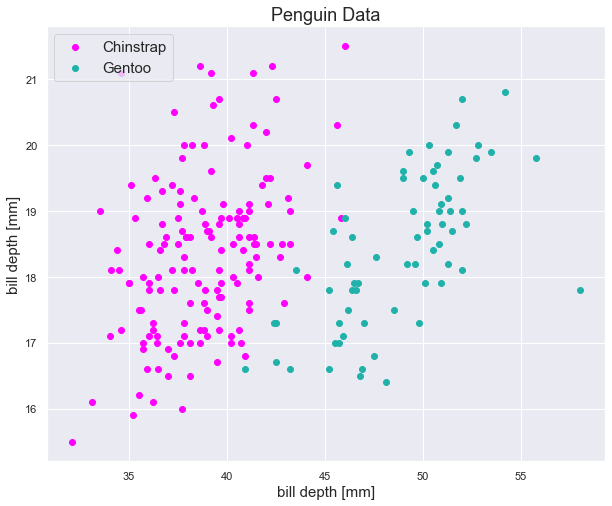

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set Theme
sns.set_theme()

# Load penguin data 
penguins = sns.load_dataset("penguins")

Adelie = penguins[penguins.species == "Adelie"]
Chinstrap = penguins[penguins.species == "Chinstrap"]
Gentoo = penguins[penguins.species == "Gentoo"]

# Create feature matrix
X = penguins.iloc[:222][["bill_length_mm", "bill_depth_mm"]].values
X = X[~np.isnan(X).any(axis=1)] # removing rows with NaN's
y = np.where(penguins.iloc[:222].species == "Adelie", 0, 1)
y = np.delete(y, 3)

plt.figure(figsize = (10, 8))
plt.scatter(Adelie.bill_length_mm, 
            Adelie.bill_depth_mm, 
            color = "magenta", 
            label = "Chinstrap")
plt.scatter(Chinstrap.bill_length_mm, 
            Chinstrap.bill_depth_mm, 
            color = "lightseagreen", 
            label = "Gentoo")
plt.xlabel("bill depth [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Penguin Data", fontsize = 18)
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        64
           1       0.92      0.92      0.92        25

    accuracy                           0.96        89
   macro avg       0.94      0.94      0.94        89
weighted avg       0.96      0.96      0.96        89
 



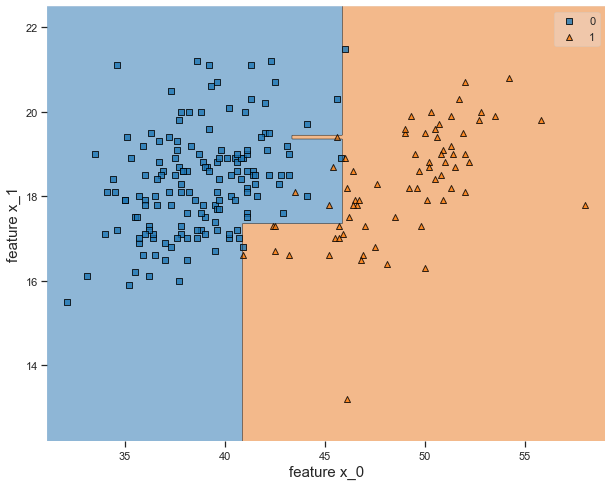

In [3]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = ada_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

In [4]:
X = penguins.iloc[:222][["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
X = X[~np.isnan(X).any(axis=1)] # removing rows with NaN's
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.96      0.96      0.96        25

    accuracy                           0.98        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.98      0.98      0.98        89
 

